Copied from https://keras.io/examples/vision/mnist_convnet/, modified data loading / augmentation.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf
import datetime
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import regularizers
from tensorflow.keras import layers

import numpy as np
import os

2025-08-31 15:29:57.995135: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-31 15:29:57.998304: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-08-31 15:29:58.007133: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756646998.021849  422234 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756646998.026373  422234 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1756646998.038359  422234 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linkin

In [3]:
batch_size = 32
epochs = 100

IMG_WIDTH = IMG_HEIGHT = 28
RANDOM_SEED = 65657867

DATA_DIR = os.getenv('DATA_DIR')
TRAINING_DATA_DIR = os.path.join(DATA_DIR, 'digit-data')

augmented_image_gen = ImageDataGenerator(
    rotation_range=2,
    width_shift_range=.1,
    height_shift_range=.1,
    zoom_range=0.1,
    shear_range=2,
    brightness_range=[0.9, 1.1],
    validation_split=0.2,
    samplewise_center=True,
    samplewise_std_normalization=True)

normal_image_gen = ImageDataGenerator(
    validation_split=0.2,
    samplewise_center=True,
    samplewise_std_normalization=True
)


train_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory=TRAINING_DATA_DIR,
                                                     color_mode="grayscale",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical",
                                                     seed=RANDOM_SEED,
                                                     subset='training')

val_data_gen = normal_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory=TRAINING_DATA_DIR,
                                                     color_mode="grayscale",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical",
                                                     seed=RANDOM_SEED,
                                                     subset='validation')

Found 4249 images belonging to 10 classes.
Found 1060 images belonging to 10 classes.


In [4]:
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

E0000 00:00:1756647000.677735  422234 cuda_executor.cc:1228] INTERNAL: CUDA Runtime error: Failed call to cudaGetRuntimeVersion: Error loading CUDA libraries. GPU will not be used.: Error loading CUDA libraries. GPU will not be used.
W0000 00:00:1756647000.678296  422234 gpu_device.cc:2341] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'])

history = model.fit(
    train_data_gen,
    steps_per_epoch=train_data_gen.samples // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=val_data_gen.samples // batch_size
)

Epoch 1/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.7759 - loss: 0.7003 - val_accuracy: 0.9867 - val_loss: 0.0543
Epoch 2/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9375 - loss: 0.2794 - val_accuracy: 0.9867 - val_loss: 0.0546
Epoch 3/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9668 - loss: 0.1069 - val_accuracy: 0.9943 - val_loss: 0.0389
Epoch 4/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.0725 - val_accuracy: 0.9943 - val_loss: 0.0389
Epoch 5/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.9794 - loss: 0.0687 - val_accuracy: 0.9905 - val_loss: 0.0313
Epoch 6/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9688 - loss: 0.1036 - val_accuracy: 0.9915 - val_loss: 0.0317
Epoch 7/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - accuracy: 0.9879 - loss: 0.0471 - val_accuracy: 0.9934 - val_loss: 0.0253
Epoch 8/100
132/132 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9688 - loss: 0.0425 - val_

In [6]:
score = model.evaluate(val_data_gen, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03494277969002724
Test accuracy: 0.994339644908905


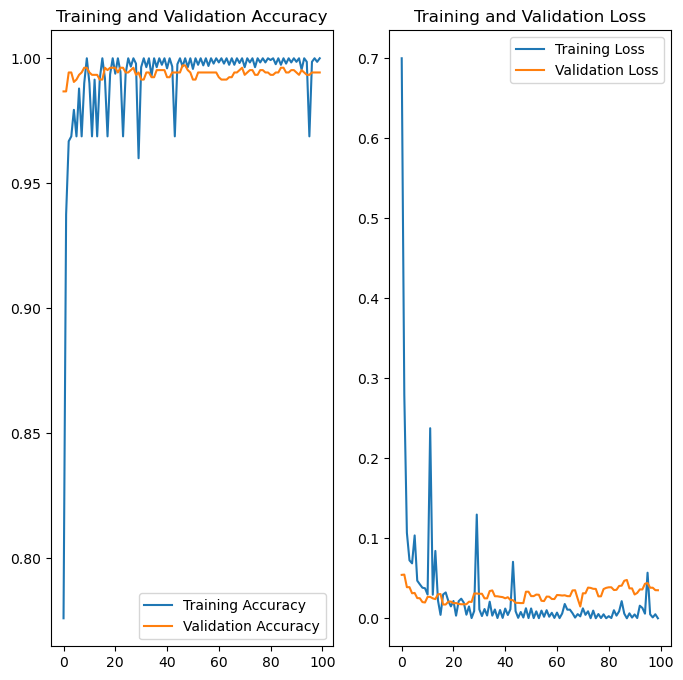

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Finally retrain on all data (set epochs to 50 after seeing history above):

In [8]:
all_data_gen = augmented_image_gen.flow_from_directory(batch_size=batch_size,
                                                     directory=TRAINING_DATA_DIR,
                                                     color_mode="grayscale",
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode="categorical")

Found 5309 images belonging to 10 classes.


In [9]:
all_history = model.fit(
    all_data_gen,
    steps_per_epoch=all_data_gen.samples // batch_size,
    epochs=50)

Epoch 1/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 39ms/step - accuracy: 0.9966 - loss: 0.0210
Epoch 2/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 82us/step - accuracy: 1.0000 - loss: 0.0044
Epoch 3/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9958 - loss: 0.0188
Epoch 4/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 84us/step - accuracy: 1.0000 - loss: 0.0083
Epoch 5/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.9979 - loss: 0.0097
Epoch 6/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 80us/step - accuracy: 1.0000 - loss: 0.0039
Epoch 7/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.9973 - loss: 0.0097
Epoch 8/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 103us/step - accuracy: 0.9688 - loss: 0.0920
Epoch 9/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 40ms/step - accuracy: 0.9970 - loss: 0.0086
Epoch 10/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 0s 70us/step - accuracy: 1.0000 - loss: 0.0018
Epoch 11/50
165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 39ms/step - accuracy: 0.9972 - loss: 0.0115
Epoch 12/50
165/165 ━━━━━━━━━━━━━━━━━━━━

In [10]:
model.save(os.path.join(DATA_DIR, 'output', 'model.keras'))

In [11]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(model, os.path.join(DATA_DIR, 'output', 'model.tfjs'))

failed to lookup keras version from the file,
    this is likely a weight only file
